# Möbiusova traka

***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib.tri import Triangulation
import matplotlib.patches as pat
from IPython.display import display, HTML, Image
import IPython.display as ipd
from matplotlib.animation import FuncAnimation

### Uvod i svojstva

Möbiusova traka (petlja ili vrpca), dugogodišnji je predmet proučavanja topologije zbog njenih zanimljivih svojstava. Za početak, ako povučemo crtu od jedne točke po sredini trake, završit ćemo kod početne točke, ali s druge strane vrpce. Nastavimo li povlačiti crtu, nakon još jednog prolaza vratit ćemo se u početnu točku, te će crta biti dvostruko dulja od samo vrpce. Ova kontinuirana linija pokazuje da Möbiusova traka ima samo jednu stranu i jedan rub. <br>
Također, ona je neorijentabilna ploha. Neorijentabilnost je njezino unutarnje svojstvo. Razmišljamo li o traci isključivo
kao o plohi, zanemarivši njezinu debljinu, pred nama je dvodimenzionalan prostor.

Kako napraviti Möbiusovu traku? <br>
Möbiusova traka je površina koja nastaje od pravokutne trake tako što se jedna stranica zarotira za 180 stupnjeva i zalijepi sa suprotnom stranicom.

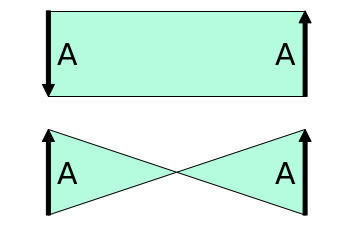

In [2]:
fig, (ax, ax2) = plt.subplots(2,1)
ax.axis("off")
ax.axis('equal')
ax2.axis("off")
ax2.axis('equal')

ax.set_xlim(-0.1, 6)
ax.set_ylim(-0.1, 2)
ax.axis('equal')

ax2.set_xlim(-0.1, 6)
ax2.set_ylim(-0.1, 2)
ax2.axis('equal')

rect = pat.Rectangle((0,0), width=6, height=2, facecolor="#B5FBDD", edgecolor="black")
ax.add_patch(rect)

ax.annotate("", xy=(0, 0), xytext=(0, 2), arrowprops=dict(facecolor='black'))
ax.annotate("", xy=(6, 2), xytext=(6, 0), arrowprops=dict(facecolor='black'))

ax.text(0.18, 0.5, 'A', horizontalalignment='center', verticalalignment='center', 
        fontsize=30, color='black', transform=ax.transAxes)
ax.text(0.83, 0.5, 'A', horizontalalignment='center', verticalalignment='center', 
        fontsize=30, color='black', transform=ax.transAxes)

tocke1 = np.array([ [0,0], [0,2] , [3,1] ])
trokut1 = pat.Polygon(tocke1, True, facecolor="#B5FBDD", edgecolor="black")
tocke2 = np.array([ [6,0], [6,2] , [3,1] ])
trokut2 = pat.Polygon(tocke2, True, facecolor="#B5FBDD", edgecolor="black")

ax2.add_patch(trokut1)
ax2.add_patch(trokut2)

ax2.annotate("", xy=(0, 2), xytext=(0, 0), arrowprops=dict(facecolor='black'))
ax2.annotate("", xy=(6, 2), xytext=(6, 0), arrowprops=dict(facecolor='black'))

ax2.text(0.18, -0.7, 'A', horizontalalignment='center', verticalalignment='center', 
        fontsize=30, color='black', transform=ax.transAxes)
ax2.text(0.83, -0.7, 'A', horizontalalignment='center', verticalalignment='center', 
        fontsize=30, color='black', transform=ax.transAxes)

plt.show()

Još jedno zanimljivo svojstvo je da se rezanjem Möbiusove trake po sredini dobiva jedna duža traka sa dva puna zavoja, a ne dvije odvojene trake, kao što bi se očekivalo. Dobivena traka nije Möbiusova.

Sa druge strane, ako se Möbiusova traka reže ne po sredini, već na udaljenosti od jedne trećine svoje širine do ruba, rezultat će biti dvije trake. Jedna traka je kraća i Möbiusova, dok duža traka sadrži dva zavoja (nije Möbiusova), no ona je ona rezultat rezanja početne Möbiusove trake po sredini.


<img src="mobius_half.gif" width="400" align="center">

<img src="mobius_three.gif" width="400" align="center">

Općenito, dodavanjem još zavoja i spajanjem krajeva dobivaju se figure koje se nazivaju paradromski prsteni. Tablica prikazuje rezultate za neke brojeve zavoja, rezova i dijelova na koje se vrpca reže.

In [3]:
tablica = pd.read_csv("prstenovi.csv")
tablica.style.set_table_styles([dict(selector='td', props=[('text-align', 'center'), ('background-color', '#FFE0BC')]),
                         dict(selector=('th'), props=[('text-align', 'center'), ('background-color', '#FEAC92')])]).hide_index()

Zavoji,Rezovi,Dijelovi,Rezultat
1,1,2,1 vrpca duljine 2 i 1 Mobiusova vrpca duljine 1
1,2,4,2 vrpce duljine 2
1,2,5,2 vrpce duljine 2 i 1 Möbiusova vrpca duljine 1
1,3,6,3 vrpce duljine 2
1,3,7,3 vrpce duljine 2 i 1 Möbiusova vrpca duljine 1
2,1,2,2 vrpce duljine 1
2,2,3,3 vrpce duljine 1
2,3,4,4 vrpce duljine 1


### Matematička strana trake

Parametarske jednadžbe Möbiusove trake debljine $z = 0$, širine $2p$ i savijene u krug radijusa $R$, glase ovako:

$$x = \left[ R + s\cos\left(\frac{t}{2}\right)\right] \cos t $$

$$y = \left[ R + s\cos\left(\frac{t}{2}\right)\right] \sin t $$

$$z = s\sin\left(\frac{t}{2}\right), $$

gdje je $s \in \left[-p, p\right]$ i $t \in \left[0, 2\pi \right>$

Za izračunavanje duljine ruba (opsega) Möbiusove trake, potrebno je integrirati sljedeću funkciju:

$$
\begin{align}
ds &= \sqrt{x^{'2} + y^{'2}}\\
&= \left[\frac{p^{4}}{16}\cos^4\left(\frac{t}{2}\right)+ \left( \left[R + p\cos\left(\frac{t}{2}\right)\right]\cos t - \frac{p}{2} \sin\left(\frac{t}{2}\right) \sin t \right)^4 + \left( R\sin t + \frac{t}{4} \left[ \sin t \left(\frac{t}{2}\right) + 3\sin\left(\frac{3t}{2}\right) \right] \right)^{4}\right]^{\frac{1}{2}}
\end{align}
$$

od $0$ do $4\pi$, što se nažalost ne može napraviti u zatvorenoj formuli. Iako se ploha zatvara za $t = 2\pi$, rub je napravio tek pola puta, potrebno je prjeći još dodatnih $2\pi$ da se rub zatvori.

Sada možemo konstruirati 3D prikaz trake.

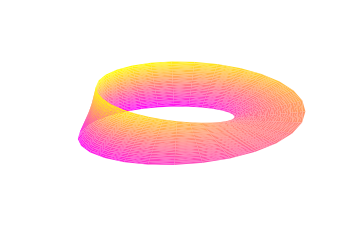

In [4]:
theta = np.linspace(0, 2 * np.pi, 30)
w = np.linspace(-0.4, 0.4, 30)
w, theta = np.meshgrid(w, theta)
phi = 0.5 * theta

r = 1 + w * np.cos(phi)

x = np.ravel(r * np.cos(theta))
y = np.ravel(r * np.sin(theta))
z = np.ravel(w * np.sin(phi))

tri = Triangulation(np.ravel(w), np.ravel(theta))

ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z, triangles=tri.triangles, cmap='spring', linewidths=4)

plt.axis("off")
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)

plt.show()

### Upotreba u svakodnevnom životu

Mobiusova traka ima i svoju praktičnu primjenu. Mnogi izumi temelje se na svojstvu jednostranosti Möbiusove trake. 1923. godine Lee De Forest izumio je patent za Möbiusovu filmsku vrpcu koja snima zvuk na obje "strane". Ista ideja primjenjivala se i kod dobrih starih kazeta tako da ste muziku slušali dvostruko dulje. <br>
Mobiusova ploha središnja je tema i u mnogim SF pričama, npr. "Zid tmine" Arthura C.Clarka, a opčinila je i mnoge umjetnike. Jedna velika Möbiusova traka postavljena je na rotirajuće postolje ispred ulaza u Muzeja povijesti i tehnologije u Washingtonu.

In [5]:
def Images(images, header, width="100%"):
    if type(width)==type(1): width = "{}px".format(width)
    html = ["<table style='width:{}'><tr>".format(width)]
    html += ["<th style='text-align:center'>{}</th>".format(h) for h in header] + ["</tr><tr>"]

    for image in images:
        html.append("<td><img src='{}' /></td>".format(image))
    
    html.append("</tr></table>")
    display(HTML(''.join(html)))

Images(["google.jpeg","recycle.png"], header=["Google drive logo", "Međunarodni znak za recikliranje"], width="70%")

Google drive logo,Međunarodni znak za recikliranje
,


J.S.Bach - Crab Canon on Möbius strip <br>
Kanon je višeglasna skladba u kojoj melodiju početnog glasa u određenom vremenskom razmaku ponavljaju ostali glasovi. Bachov kanon je višeglasna kompozicija u kojoj su dvije napisane glazbene rečenice komplementarne i jedna je zapravo ista kao druga, ali gledana od kraja, slično kao palindrom. No kompozicija nije napisana da bi se izvodila unaprijed i unazad, već da se izvodi simultano unaprijed i unazad. Ako se kitica okrene naopako, kompozicija se može izvoditi beskonačno u Möbiusovoj petlji.

<IPython.core.display.Javascript object>


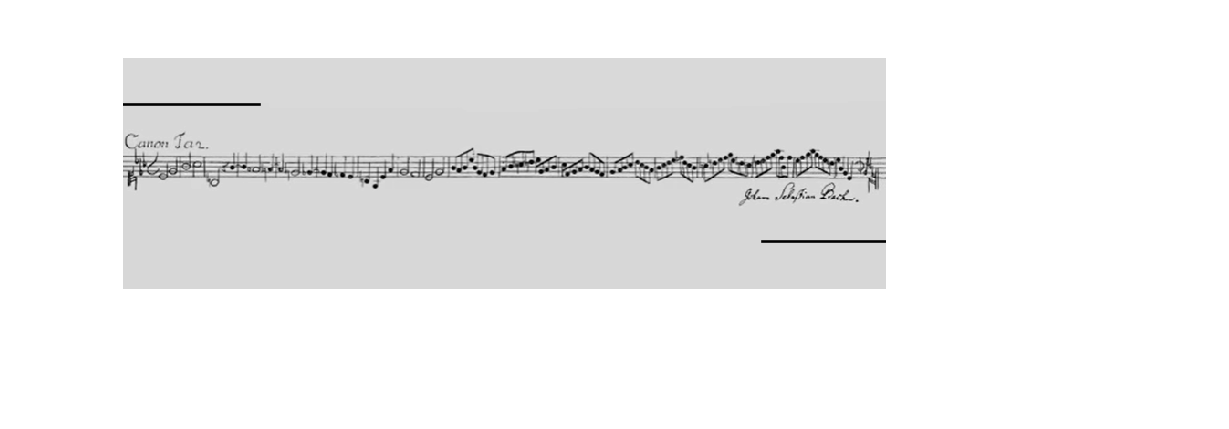

In [14]:
%matplotlib notebook

x = []
y = []

x2 = []
y2 = []

fig3, ax3 = plt.subplots()

line, = ax3.plot(0,0)
line2, = ax3.plot(0,0)

ax3.axis("off")

image = plt.imread("crab_canon.png")
ax3.imshow(image)

def animation_frame(i):
    x.append(i*85)
    y.append(50)
    
    line.set_xdata(x)
    line.set_ydata(y)
    
    line.set_color('black')
    
    return line,

def animation_frame2(i):
    x2.append(850 - i*85)  
    y2.append(200)
    
    line2.set_xdata(x2)
    line2.set_ydata(y2)
    
    line2.set_color('black')
    
    return line2,

fig3.set_size_inches(20/2.54, 7/2.54, forward=True)

animation = FuncAnimation(fig3, func=animation_frame, frames=np.arange(0, 10, 0.01), interval=10)
animation2 = FuncAnimation(fig3, func=animation_frame2, frames=np.arange(0, 10, 0.01), interval=10)

ipd.Audio('bach.m4a', autoplay=True)

### Izvori

In [12]:
display(HTML("""<a href="https://en.wikipedia.org/wiki/M%C3%B6bius_strip">Wikipedia - Möbius strip</a>"""))
display(HTML("""<a href="https://mathworld.wolfram.com/MoebiusStrip.html">Wolfram Mathworld - Möbius strip</a>"""))
display(HTML("""<a href="https://mis.element.hr/fajli/361/22-08.pdf">Element - Möbiusova traka</a>"""))
display(HTML("""<a href="https://www.cnet.com/news/bachs-musical-mobius-strip">Bach's musical Möbius strip</a>"""))